In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import auc, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, mean_squared_error, r2_score, classification_report, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve

In [2]:
# Load the dataset
glass_df = pd.read_csv('./datasets/heart_dataset.csv')
glass_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,60,1,0,140,207,0,0,138,1,1.9,2,1,3,0
1884,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
1885,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
1886,54,1,1,154,232,0,0,164,0,0.0,2,1,2,0


In [3]:
glass_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalachh    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
# Splitting features and target variable
X = glass_df.drop('target', axis=1)
y = glass_df['target']

In [5]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [7]:
# Initialize classifiers
knn = KNeighborsClassifier()
log_reg = LogisticRegression(max_iter=1000, random_state=42)
naive_bayes = GaussianNB()

In [8]:
# Train classifiers
knn.fit(X_train, y_train)
log_reg.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [9]:
# Evaluate models
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


K-Nearest Neighbors Evaluation:
Accuracy: 0.88
Precision: 0.88
Recall: 0.88
F1 Score: 0.88
Mean Squared Error (MSE): 0.12
Mean Absolute Error (MAE): 0.12
R2 Score: 0.51
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.84      0.87       286
           1       0.85      0.92      0.88       281

    accuracy                           0.88       567
   macro avg       0.88      0.88      0.88       567
weighted avg       0.88      0.88      0.88       567

Confusion Matrix:
[[239  47]
 [ 22 259]]


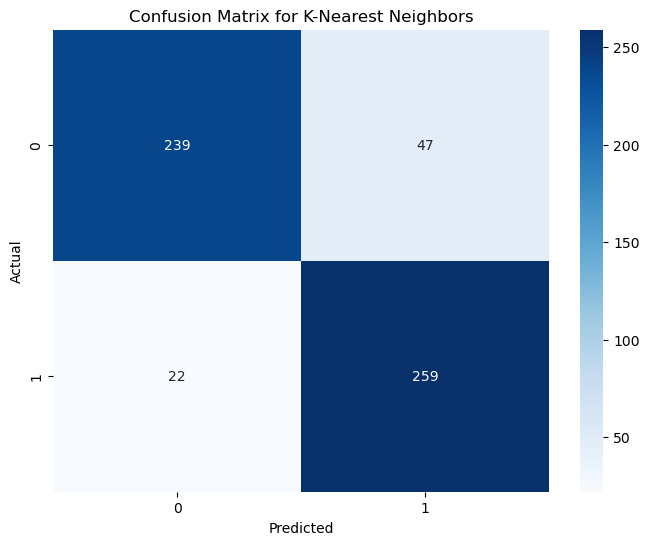


Logistic Regression Evaluation:
Accuracy: 0.73
Precision: 0.74
Recall: 0.73
F1 Score: 0.73
Mean Squared Error (MSE): 0.27
Mean Absolute Error (MAE): 0.27
R2 Score: -0.07
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.65      0.71       286
           1       0.70      0.81      0.75       281

    accuracy                           0.73       567
   macro avg       0.74      0.73      0.73       567
weighted avg       0.74      0.73      0.73       567

Confusion Matrix:
[[186 100]
 [ 52 229]]


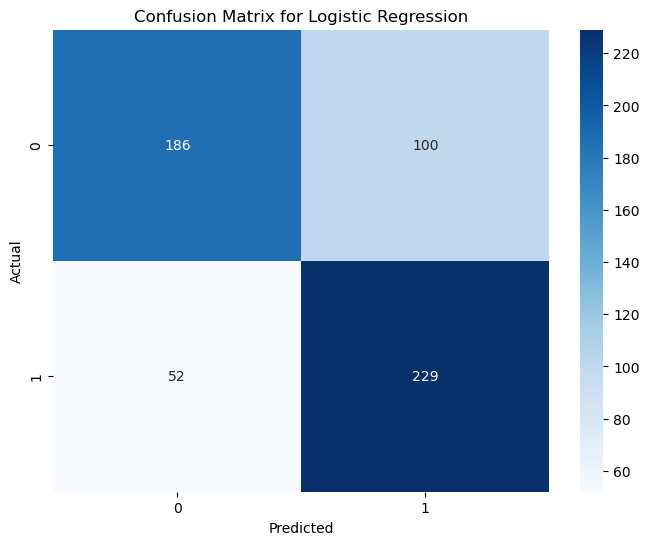


Naive Bayes Evaluation:
Accuracy: 0.69
Precision: 0.70
Recall: 0.69
F1 Score: 0.69
Mean Squared Error (MSE): 0.31
Mean Absolute Error (MAE): 0.31
R2 Score: -0.23
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.60      0.66       286
           1       0.66      0.78      0.72       281

    accuracy                           0.69       567
   macro avg       0.70      0.69      0.69       567
weighted avg       0.70      0.69      0.69       567

Confusion Matrix:
[[172 114]
 [ 61 220]]


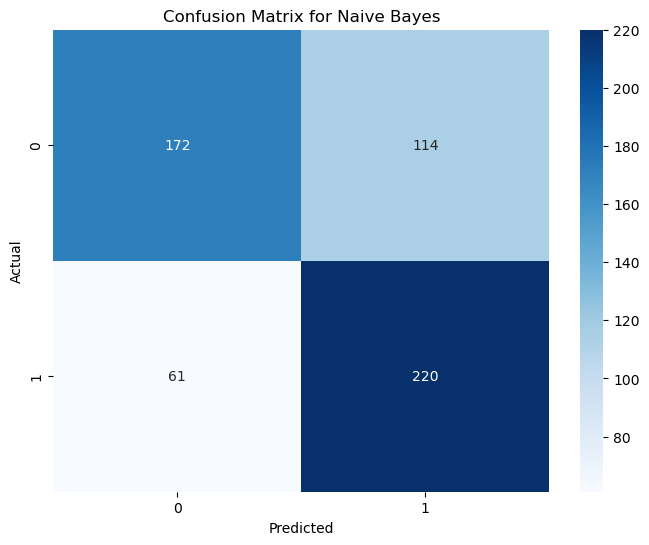

In [10]:
evaluate_model(knn, X_test, y_test, "K-Nearest Neighbors")
evaluate_model(log_reg, X_test, y_test, "Logistic Regression")
evaluate_model(naive_bayes, X_test, y_test, "Naive Bayes")

In [11]:
# Ensemble classifier using Stacking
estimators = [
    ('knn', knn),
    ('log_reg', log_reg),
    ('naive_bayes', naive_bayes)
]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=3)
stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=3,
                   estimators=[('knn', KNeighborsClassifier()),
                               ('log_reg',
                                LogisticRegression(max_iter=1000,
                                                   random_state=42)),
                               ('naive_bayes', GaussianNB())],
                   final_estimator=LogisticRegression())


Stacking Ensemble Evaluation:
Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1 Score: 0.89
Mean Squared Error (MSE): 0.11
Mean Absolute Error (MAE): 0.11
R2 Score: 0.56
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       286
           1       0.87      0.92      0.89       281

    accuracy                           0.89       567
   macro avg       0.89      0.89      0.89       567
weighted avg       0.89      0.89      0.89       567

Confusion Matrix:
[[246  40]
 [ 22 259]]


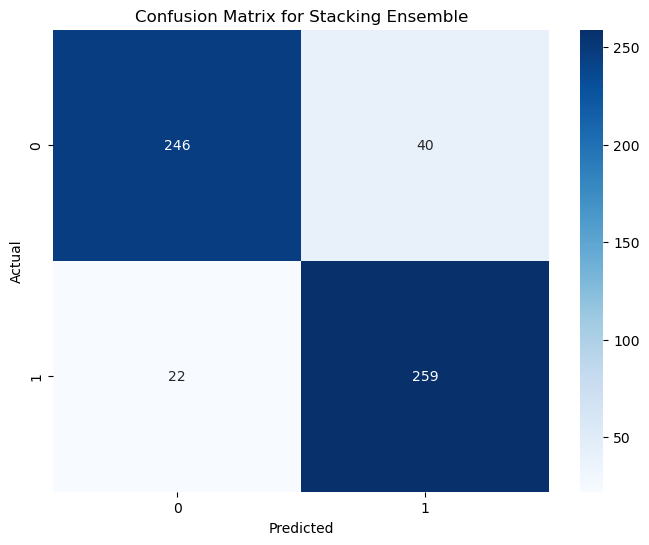

In [12]:
# Evaluate the stacking ensemble
evaluate_model(stacking_clf, X_test, y_test, "Stacking Ensemble")

In [13]:
# Hyperparameter tuning for ensemble method
param_grid = {
    'final_estimator__C': [0.1, 1, 10],
    'final_estimator__solver': ['liblinear', 'lbfgs']
}
grid_search = GridSearchCV(stacking_clf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=StackingClassifier(cv=3,
                                          estimators=[('knn',
                                                       KNeighborsClassifier()),
                                                      ('log_reg',
                                                       LogisticRegression(max_iter=1000,
                                                                          random_state=42)),
                                                      ('naive_bayes',
                                                       GaussianNB())],
                                          final_estimator=LogisticRegression()),
             param_grid={'final_estimator__C': [0.1, 1, 10],
                         'final_estimator__solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [14]:
print("\nBest parameters for Stacking Ensemble:", grid_search.best_params_)
print(f"Best accuracy from Grid Search: {grid_search.best_score_:.2f}")


Best parameters for Stacking Ensemble: {'final_estimator__C': 10, 'final_estimator__solver': 'lbfgs'}
Best accuracy from Grid Search: 0.84


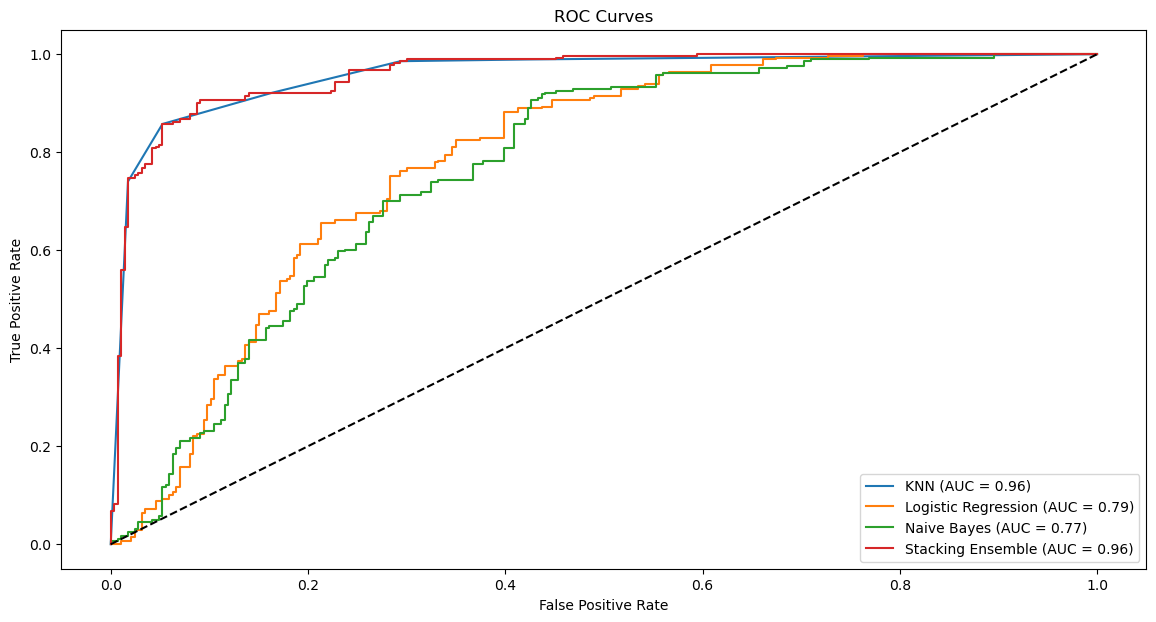

In [17]:
# Plotting ROC curve for each model
plt.figure(figsize=(14, 7))

for clf, name in zip([knn, log_reg, naive_bayes, stacking_clf], ['KNN', 'Logistic Regression', 'Naive Bayes', 'Stacking Ensemble']):
    if hasattr(clf, "predict_proba"):
        y_prob = clf.predict_proba(X_test)[:, 1] if y_test.nunique() == 2 else clf.predict_proba(X_test).max(axis=1)
        fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=y_test.max())
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

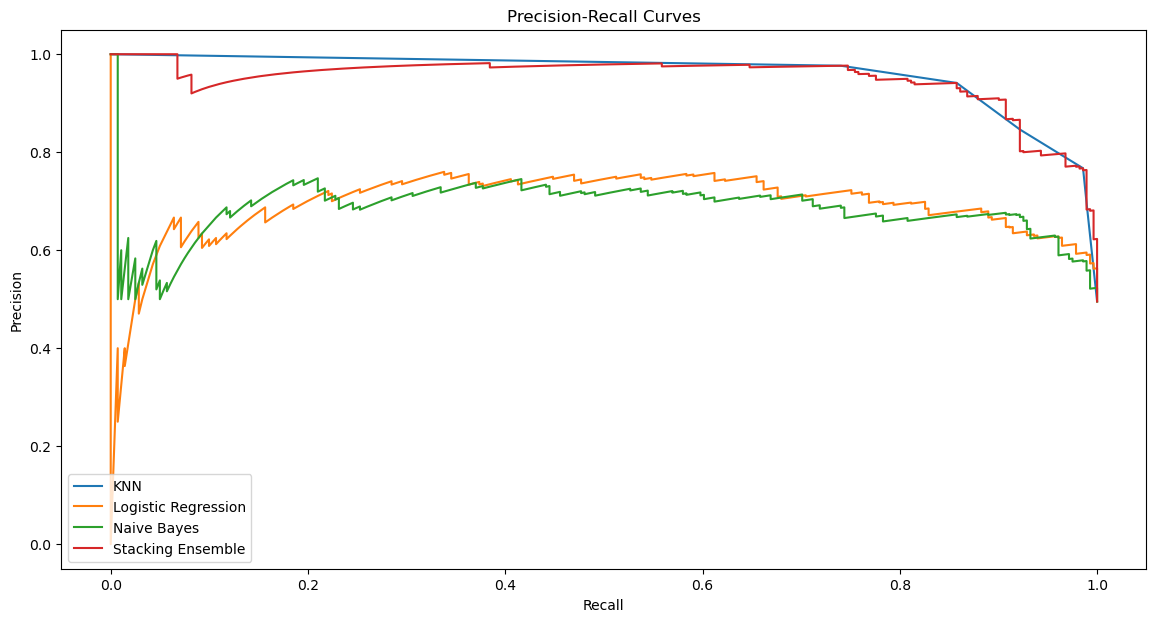

In [18]:
# Precision-Recall Curves
plt.figure(figsize=(14, 7))

for clf, name in zip([knn, log_reg, naive_bayes, stacking_clf], ['KNN', 'Logistic Regression', 'Naive Bayes', 'Stacking Ensemble']):
    if hasattr(clf, "predict_proba"):
        y_prob = clf.predict_proba(X_test)[:, 1] if y_test.nunique() == 2 else clf.predict_proba(X_test).max(axis=1)
        precision, recall, _ = precision_recall_curve(y_test, y_prob, pos_label=y_test.max())
        plt.plot(recall, precision, label=f'{name}')

plt.title('Precision-Recall Curves')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()

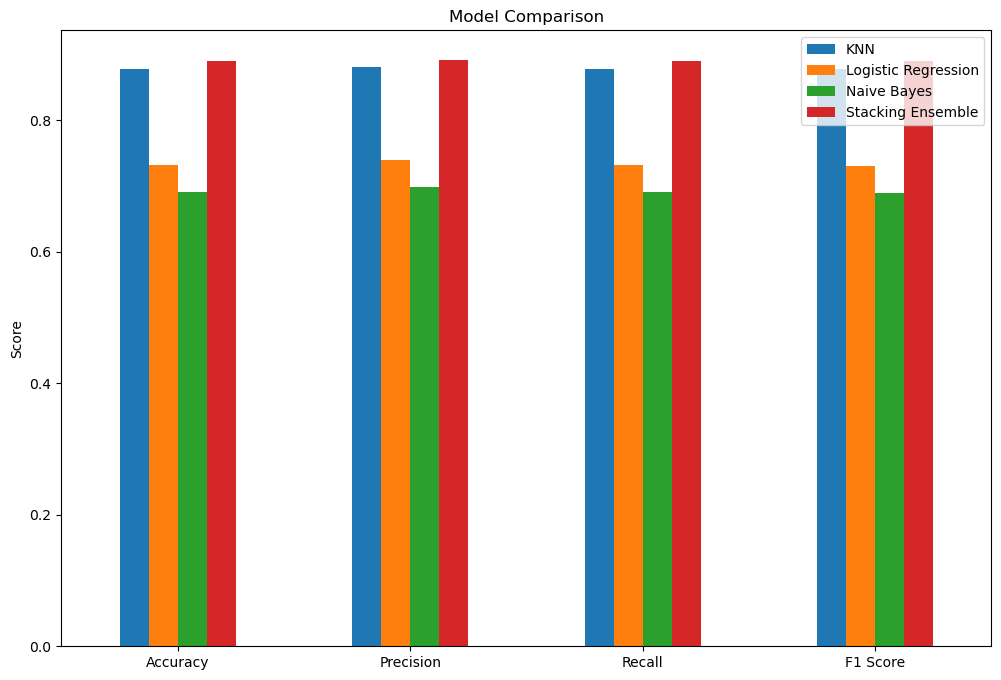

In [25]:
# Bar chart for model comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
results = {
    'KNN': [accuracy_score(y_test, knn.predict(X_test)),
            precision_score(y_test, knn.predict(X_test), average='weighted'),
            recall_score(y_test, knn.predict(X_test), average='weighted'),
            f1_score(y_test, knn.predict(X_test), average='weighted')],
    'Logistic Regression': [accuracy_score(y_test, log_reg.predict(X_test)),
                            precision_score(y_test, log_reg.predict(X_test), average='weighted'),
                            recall_score(y_test, log_reg.predict(X_test), average='weighted'),
                            f1_score(y_test, log_reg.predict(X_test), average='weighted')],
    'Naive Bayes': [accuracy_score(y_test, naive_bayes.predict(X_test)),
                    precision_score(y_test, naive_bayes.predict(X_test), average='weighted'),
                    recall_score(y_test, naive_bayes.predict(X_test), average='weighted'),
                    f1_score(y_test, naive_bayes.predict(X_test), average='weighted')],
    'Stacking Ensemble': [accuracy_score(y_test, stacking_clf.predict(X_test)),
                          precision_score(y_test, stacking_clf.predict(X_test), average='weighted'),
                          recall_score(y_test, stacking_clf.predict(X_test), average='weighted'),
                          f1_score(y_test, stacking_clf.predict(X_test), average='weighted')]
}

df_results = pd.DataFrame(results, index=metrics)
df_results.plot(kind='bar', figsize=(12, 8))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()

In [21]:
df_results

,KNN,Logistic Regression,Naive Bayes,Stacking Ensemble
Accuracy,0.878307,0.731922,0.691358,0.890653
Precision,0.881363,0.739157,0.698791,0.892294
Recall,0.878307,0.731922,0.691358,0.890653
F1 Score,0.878117,0.730191,0.688898,0.890573
